# Table of Contents

1. Importing libraries and data. 1.1. Reducing the volume of data set df_ords for subsequent work on part 2

2. Creating a loyalty flag for existing customers for the new smaller data set
3. Creating a spending flag to target customers
4. Creating an order frequency flag that marks the regularity of a user’s ordering behavior
5. Continuing task 4.9_part 2.2, proceeding with line chart and further
6. Check the difference in expenditure (the “prices” column) depending on the hour of the day
7. Exploratory analysis of customer demographics
8. Export (some files already exported in part 2.1)

# 1. Importing libraries and data

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Set the path
path = r'C:\Users\midov\Documents\Studies\Data Analysis\Immersion into Data Analytics\Achievement 4_Python Fundamentals for Data Analysts\Instacart Basket Analysis'

## 1.1 Reducing the volume of data set df_ords for subsequent work on part 2

In [4]:
#Import orders
df_ords = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'order_cleaned.csv'), nrows=1000)

In [5]:
df_ords.head()

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer
0,0,0,2539329,1,1,2,8,NaN,True
1,1,1,2398795,1,2,3,7,15.0,False
2,2,2,473747,1,3,3,12,21.0,False
3,3,3,2254736,1,4,4,7,29.0,False
4,4,4,431534,1,5,4,15,28.0,False


In [6]:
#Import dataframe
df_prods = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'products_cleaned.csv'), index_col = 0)

In [7]:
df_prods.head()

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3


In [8]:
#Import the “order_products_prior.csv” data set
df_ords_prior = pd.read_csv(os.path.join(path, 'Data', 'Original Data','order_products_prior', 'order_products_prior.csv'))

In [9]:
df_ords_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
#Merge tables
df_merged_large = df_ords.merge(df_ords_prior, on = 'order_id', indicator = True)

In [11]:
df_merged_large.head()

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,_merge
0,0,0,2539329,1,1,2,8,NaN,True,196,1,0,both
1,0,0,2539329,1,1,2,8,NaN,True,14084,2,0,both
2,0,0,2539329,1,1,2,8,NaN,True,12427,3,0,both
3,0,0,2539329,1,1,2,8,NaN,True,26088,4,0,both
4,0,0,2539329,1,1,2,8,NaN,True,26405,5,0,both


In [12]:
# Remove 'Unnamed: 0' column
df_merged_large = df_merged_large.drop(columns = ['Unnamed: 0.1'])

In [13]:
#Export the merged file in pickle format as “orders_products_combined.pkl”
df_merged_large.to_pickle(os.path.join(path, 'Data','Prepared Data', 'orders_products_combined.pkl'))

In [14]:
df_merged_large.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,_merge
0,0,2539329,1,1,2,8,NaN,True,196,1,0,both
1,0,2539329,1,1,2,8,NaN,True,14084,2,0,both
2,0,2539329,1,1,2,8,NaN,True,12427,3,0,both
3,0,2539329,1,1,2,8,NaN,True,26088,4,0,both
4,0,2539329,1,1,2,8,NaN,True,26405,5,0,both


In [15]:
#Import dataframe
df_ords_prods_combined = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_combined.pkl'))

In [16]:
#Combine data sets
df_orders_products_merged = df_ords_prods_combined.merge(df_prods, on = 'product_id')

In [17]:
df_orders_products_merged.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices
0,0,2539329,1,1,2,8,NaN,True,196,1,0,both,Soda,77,7,9.0
1,1,2398795,1,2,3,7,15.0,False,196,1,1,both,Soda,77,7,9.0
2,2,473747,1,3,3,12,21.0,False,196,1,1,both,Soda,77,7,9.0
3,3,2254736,1,4,4,7,29.0,False,196,1,1,both,Soda,77,7,9.0
4,4,431534,1,5,4,15,28.0,False,196,1,1,both,Soda,77,7,9.0


In [18]:
#Import dataframe as "orders_products_merged"
df_orders_products_merged.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_merged.pkl'))

In [19]:
#Import the “customers.csv” file as df_customers, using path variable
df_customers = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'customers.csv'), index_col = False)

In [20]:
df_customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [21]:
# Rename the columns with illogical names
df_customers.rename(columns= {'First Name':'first_name', 'Surnam': 'surname', 'Gender':'gender', 'STATE':'state',
                          'Age':'age', 'n_dependants':'no_of_dependants', 'fam_status':'marital_status'}, inplace = True)

# 2. Creating a loyalty flag for existing customers for the new smaller data set

In [22]:
# Step one: Create a new column with max_order
df_orders_products_merged['max_order'] = df_orders_products_merged.groupby(['user_id'])['order_number'].transform(np.max)

In [23]:
# Step two: Create loyalty_flag column based on max order criteria
df_orders_products_merged.loc[df_orders_products_merged['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
df_orders_products_merged.loc[(df_orders_products_merged['max_order'] <= 40) & (df_orders_products_merged['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
df_orders_products_merged.loc[df_orders_products_merged['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

# 3. Creating a spending flag to target customers

In [24]:
#Create a new column for average prices for each user
df_orders_products_merged['avg_price'] = df_orders_products_merged.groupby(['user_id'])['prices'].transform(np.mean)

# 4. Creating an order frequency flag that marks the regularity of a user’s ordering behavior

In [25]:
#Create a new column according to median since last order
df_orders_products_merged['median_order_duration'] = df_orders_products_merged.groupby(['user_id'])['days_since_last_order'].transform(np.median)

In [26]:
#Assign frequency flag based on median days since previous order
df_orders_products_merged.loc[df_orders_products_merged['median_order_duration']>20,'Frequency_flag'] ='Non-frequent customer'
df_orders_products_merged.loc[(df_orders_products_merged['median_order_duration']>10) & (df_orders_products_merged['median_order_duration']<=20), 'Frequency_flag'] = 'Regular customer'
df_orders_products_merged.loc[df_orders_products_merged['median_order_duration']<=10,'Frequency_flag'] ='Frequent customer'

In [27]:
#Export your dataframe as a pickle file
df_orders_products_merged.to_pickle(os.path.join(path,'Data','Prepared Data', 'orders_products_merged_user_flags.pkl'))

In [28]:
# Rename the columns with illogical names
df_customers.rename(columns= {'First Name':'first_name', 'Surnam': 'surname', 'Gender':'gender', 'STATE':'state',
                          'Age':'age', 'n_dependants':'no_of_dependants', 'fam_status':'marital_status'}, inplace = True)

In [29]:
#Merge the df "customers" with df ords_prds_merged
df_merged = df_orders_products_merged.merge(df_customers, on = 'user_id')

In [30]:
#Export new merged file as pkl
df_merged.to_pickle(os.path.join(path, 'Data','Prepared Data', 'df_merged_final.pkl'))

# 5. Continuing task 4.9_part 2.2, proceeding with line chart and further

In [31]:
#Create a line chart, using a sample subset 
np.random.seed(4)

In [32]:
#Create a sample (70/30) and Create a list holding True/False values to the test np.random.rant() <=0.7
dev = np.random.rand(len(df_merged)) <= 0.7

In [33]:
#Store 70% of the sample in the dataframe big
big = df_merged[dev]

In [34]:
#Store 30% of the sample in the dataframe small 
small = df_merged[~dev]

In [35]:
#Check the the execution for accuraccy 
len(df_merged)

8528

In [36]:
len(big) + len(small)

8528

In [37]:
#Create a new data frame with the columns needed for the line chart
df_small = small[['orders_day_of_week','prices']]

In [38]:
df_small

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
8497,1,2.4
8499,5,13.5
8514,5,5.5
8516,5,10.9


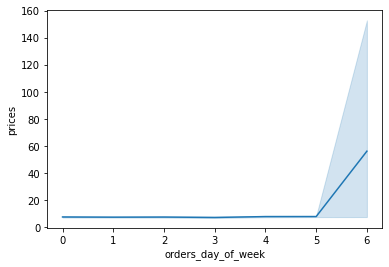

In [39]:
#Create line chart on 30% sample df
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

In [40]:
df_merged = df_merged.reset_index(drop=True) 

#Import final data set
df_final = pd.read_pickle(os.path.join(path,'Data','Prepared Data', 'df_merged_final.pkl'))

In [41]:
#Import final data set 
df_final = pd.read_pickle(os.path.join(path,'Data','Prepared Data', 'df_merged_final.pkl'))

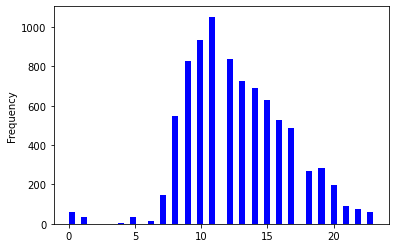

In [42]:
#Create a histogram of the “order_hour_of_day” column
hist_hod = df_final['order_hour_of_day'].plot.hist(bins = 50, color = 'blue')

Findings about sales: most sales are done close to 11am with subsequent decline after noon. Sales activity at night is insignificant but still exists.

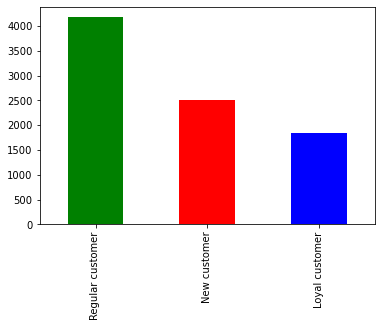

In [43]:
#Create a bar chart from the “loyalty_flag” column
bar_loyalty = df_final['loyalty_flag'].value_counts().plot.bar(color = ['green', 'red', 'blue'])

The distribution of orders among customers: regular customers have the largest portion of orders.

# 6. Check the difference in expenditure (the “prices” column) depending on the hour of the day

In [44]:
#Create new data frame with the columns needed for the line chart (use the earlier splitted data - 30% of the sample)
df_small_2 = small[['order_hour_of_day','prices']]

In [45]:
df_small_2

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
8497,13,2.4
8499,13,13.5
8514,13,5.5
8516,11,10.9


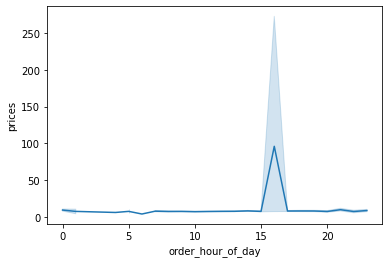

In [46]:
#Create a line chart on 30% sample df
line_2 = sns.lineplot(data = df_small_2, x = 'order_hour_of_day',y = 'prices')

The sales with the highest prices are done around noon with the peak approximately at 2pm.

# 7. Exploratory analysis of customer demographics

In [47]:
#Determine if there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents
#Create new data frame with the columns needed for the line chart (use the earlier splitted data - 30% of the sample)
df_small_3 = small[['age','no_of_dependants']]

In [48]:
df_small_3

,age,no_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
8497,31,3
8499,31,3
8514,31,3
8516,31,3


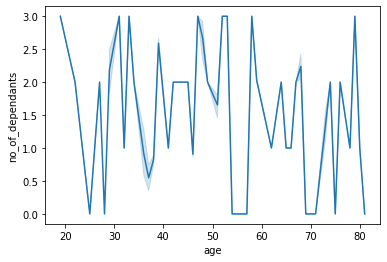

In [49]:
line_3 = sns.lineplot(data = df_small_3, x = 'age',y = 'no_of_dependants')

There is no clear trend or connection between age and family dependents for Instacart customers

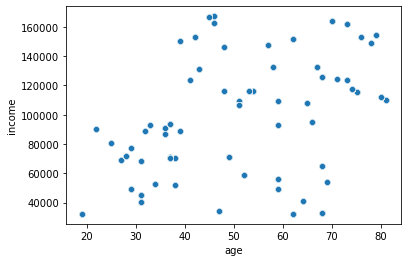

In [50]:
#Explore whether there’s a connection between age and spending power (income).
#Create a scatterplot using the sns.scatterplot() function
scatterplot_2 = sns.scatterplot(x = 'age', y = 'income', data = df_final)

The customers of age group 25-40 have income up to $100,000. The income of 40+ group almost doubles. The higher the age, the higher is the spending power. The highest spending power belongs to around 50 and 70 year olds.

# 8. Export (some files already exported in part 2.1)

In [51]:
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_days_prices.png'))

In [52]:
hist_hod.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'order_hour_of_day.png'))

In [53]:
bar_loyalty.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [54]:
line_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_hour_prices.png'))

In [55]:
line_3.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_age_no_of_dependants.png'))

In [56]:
scatterplot_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_income.png'))